In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


In [169]:
import re
pattern=(r'.*\$(\d*\,?\d+).?')

In [173]:
re.findall(pattern,'fined $1,000kk')[0]

'1,000'

In [177]:
fined = pd.DataFrame()

In [178]:
for gap in range(0,2551,25):
    print(gap)
    web = requests.get(f'https://www.prosportstransactions.com/basketball/Search/SearchResults.php?Player=&Team=&BeginDate=&EndDate=&DisciplinaryChkBx=yes&Submit=Search&start={gap}')
    content = web.content
    soup = BeautifulSoup(content,'html.parser')
    html = soup.find(name='table',attrs={"class":"datatable center"})
    data = pd.read_html(str(html))[0]
    data.columns=['Date','Team','Acquired','Relinquished','Notes']
    data = data[data['Relinquished'].notnull()]
    data['Notes']=data['Notes'].apply(lambda x:x.replace('K','000'))
    data['Notes']=data['Notes'].apply(lambda x:x.replace(',',''))
    data['Money']=data['Notes'].apply(lambda x:re.findall(pattern,x))
    data['Money']=data['Money'].apply(lambda x:int(x[0]) if x else 0)
    data['Relinquished']=data['Relinquished'].apply(lambda x:x.replace('• ',''))
    
    data = data[data['Money']!=0]
    fined=pd.concat([fined,data])

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
525
550
575
600
625
650
675
700
725
750
775
800
825
850
875
900
925
950
975
1000
1025
1050
1075
1100
1125
1150
1175
1200
1225
1250
1275
1300
1325
1350
1375
1400
1425
1450
1475
1500
1525
1550
1575
1600
1625
1650
1675
1700
1725
1750
1775
1800
1825
1850
1875
1900
1925
1950
1975
2000
2025
2050
2075
2100
2125
2150
2175
2200
2225
2250
2275
2300
2325
2350
2375
2400
2425
2450
2475
2500
2525
2550


In [180]:
fined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1318 entries, 3 to 24
Data columns (total 6 columns):
Date            1318 non-null object
Team            1318 non-null object
Acquired        0 non-null object
Relinquished    1318 non-null object
Notes           1318 non-null object
Money           1318 non-null int64
dtypes: int64(1), object(5)
memory usage: 72.1+ KB


In [181]:
fined['Money'].max()

600000

In [183]:
fined[fined['Money']==600000]

,Date,Team,Acquired,Relinquished,Notes,Money
5,2018-02-22,Mavericks,NaN,Mark Cuban,fined as owner $600000 by NBA for comments sta...,600000


In [184]:
c=Counter(fined['Relinquished'])

In [206]:
c.most_common()[0][0]

"Shaquille O'Neal"

In [207]:
total={}

In [208]:
for i in range(len(c.most_common())):
    name=c.most_common()[i][0]
    fine = fined[fined['Relinquished']==name]['Money'].sum()
    total[name]=fine

In [189]:
248500*30

7455000

In [191]:
2465000*30

73950000

In [253]:
total_df = pd.DataFrame(total.items()).sort_values(1,ascending=False)

In [220]:
fined[fined['Relinquished']=='Stephon Marbury']

,Date,Team,Acquired,Relinquished,Notes,Money,Total
20,1997-11-14,Timberwolves,NaN,Stephon Marbury,fined $2500 by NBA for wearing shorts too long,2500,594500
2,2005-12-07,Knicks,NaN,Stephon Marbury,fined $10000 by NBA for wearing shorts too long,10000,594500
18,2007-11-14,Knicks,NaN,Stephon Marbury,fined 1 game's pay (~$182000) for missing game,182000,594500
10,2008-11-28,Knicks,NaN,Stephon Marbury,suspended by team for 1 game and fined 2 days ...,400000,594500


In [ ]:
Mark Cuban

In [222]:
fined[fined['Relinquished']=='Mark Cuban']['Notes']

8     fined as owner $5000 by NBA for comments made ...
9     fined as owner $15000 by NBA for confronting a...
11    fined as owner $25000 by NBA for verbally abus...
7     fined as owner $250000 by NBA for having a fre...
8     fined as owner $100000 by NBA for decorum not ...
3     owner suspended by NBA for 2 games and fined $...
8     owner suspended by NBA for 1 game and fined $1...
11    fined as owner $500000 by NBA for criticizing ...
20    fined as owner $10000 for inappropriate public...
16    fined as owner $100000 for comments criticizin...
1     fined as owner $100000 by NBA for going on the...
8     fined as owner $250000 by NBA for "several act...
23    fined as owner $25000 by NBA for improper inte...
23    fined as owner $25000 by NBA for publically cr...
7     fined as owner $100000 by NBA for public comme...
4     fined as owner $75000 by NBA for criticizing r...
20    fined as owner $50000 by NBA for criticizing r...
20    fined as owner $100000 by NBA for confront

In [225]:
team=[]
for t in fined['Team']:
    if t not in team:
        team.append(t)

In [234]:
team_dic={}
for t in team:
    team_dic[t]=fined[fined['Team']==t]['Money'].sum()

In [242]:
c = Counter(fined['Relinquished'])

In [246]:
count_df = pd.DataFrame(c.most_common())

In [326]:
pd.options.display.max_colwidth=5000

In [327]:
fined[fined['Relinquished']=="Shaquille O'Neal"]

,Date,Team,Acquired,Relinquished,Notes,Money,Total,Year
18,1995-02-25,Magic,NaN,Shaquille O'Neal,suspended by NBA for 1 game and fined $5000 for punching opposing player,5000,248500,199
20,1996-01-30,Magic,NaN,Shaquille O'Neal,fined $5000 for failing to leave the court in a timely manner and verbally abusing officials,5000,248500,199
14,1997-11-03,Lakers,NaN,Shaquille O'Neal,suspended by NBA for 1 game and fined $10000 for hitting opposing player,10000,248500,199
2,1998-04-14,Lakers,NaN,Shaquille O'Neal,fined $5000 by NBA for fighting,5000,248500,199
24,1999-02-22,Lakers,NaN,Shaquille O'Neal,fined $10000 by NBA for comments made regarding referees following game,10000,248500,199
14,1999-03-30,Lakers,NaN,Shaquille O'Neal,fined $3500 by NBA for pushing opposing player to floor,3500,248500,199
4,1999-05-19,Lakers,NaN,Shaquille O'Neal,fined $7500 for failing to leave the court in a timely manner and verbally abusing the refs following a game,7500,248500,199
18,1999-11-11,Lakers,NaN,Shaquille O'Neal,suspended by NBA for 1 game and fined $10000 for throwing a punch,10000,248500,199
3,1999-12-20,Lakers,NaN,Shaquille O'Neal,fined $10000 by NBA for criticizing referees following game,10000,248500,199
16,2001-03-13,Lakers,NaN,Shaquille O'Neal,fined $5000 by NBA for criticizing referees following game,5000,248500,200


In [267]:
fined['Year']=fined['Date'].apply(lambda x:x.split('-')[0][0:3])

In [270]:
fined[fined['Year']=='195']['Money'].sum()

375

In [272]:
decade={}
for y in fined['Year']:
    decade[y]=fined[fined['Year']==y]['Money'].sum()

In [276]:
year_df = pd.DataFrame(decade.items()).sort_values(1,ascending=False)

,0,1
6,201,12457853
5,200,8482600
4,199,1969087
7,202,426000
3,198,109308
2,197,13250
1,196,1050
0,195,375


# work apply

In [239]:
team_df = pd.DataFrame(team_dic.items()).sort_values(1,ascending=False)

In [257]:
count_df = pd.DataFrame(c.most_common()).sort_values(1,ascending=False)

In [259]:
total_df = pd.DataFrame(total.items()).sort_values(1,ascending=False)

In [277]:
year_df = pd.DataFrame(decade.items()).sort_values(1,ascending=False)

In [288]:
countdf = count_df.head(10)

In [299]:
temp=[]
for name in countdf[0]:
    temp.append(name)

temp[3]='Doc Rivers'

countdf[0]=temp

In [306]:
countdf.columns=['Player','Times']

In [295]:
plt.style.use( 'fivethirtyeight')

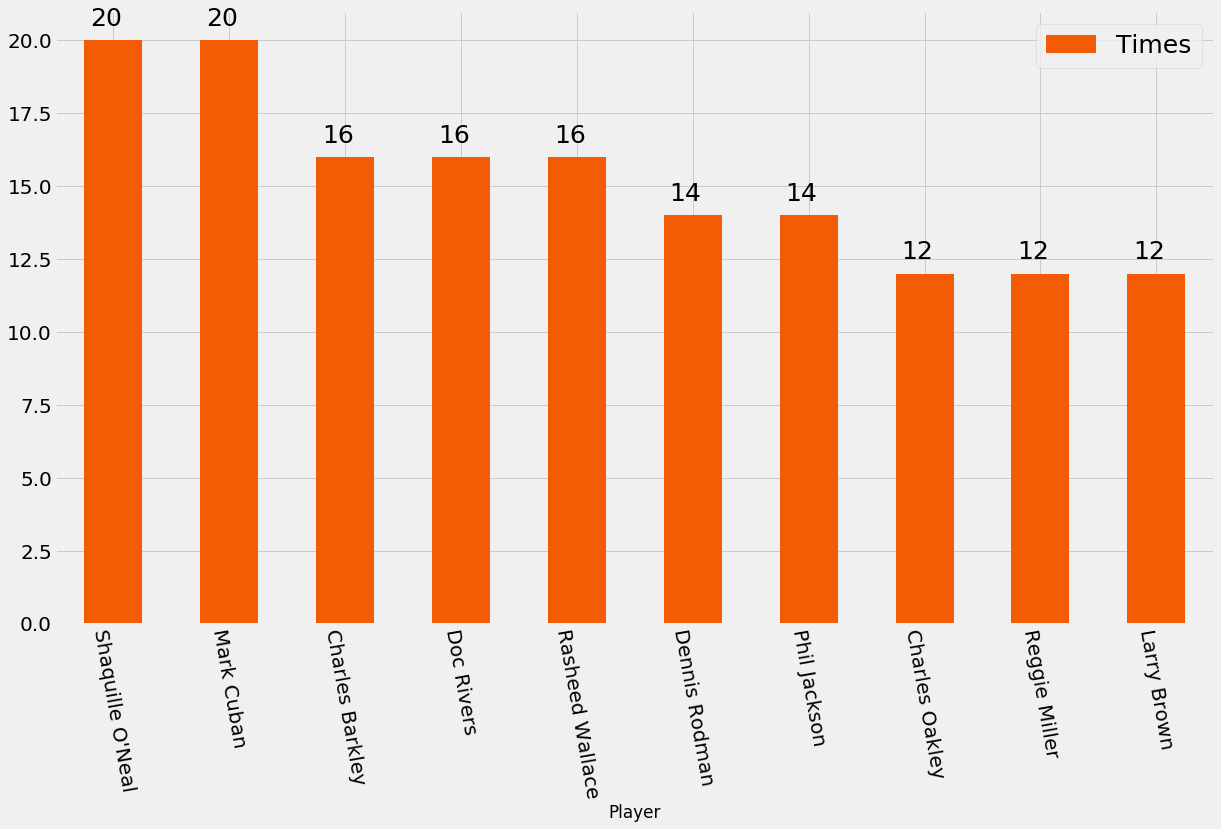

In [310]:
countdf.plot.bar(x='Player',y='Times',color='#F35B04')
plt.xticks(rotation=280)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
a=-0.2
for c in countdf['Times']:
    plt.text(a,c+0.5,(str(c)),fontsize=25)
    a+=1
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(['Times'],loc = 0, prop = {'size':25})


In [334]:
total_df.columns=['Player','Fine']

total_df = total_df.head(10)

In [349]:
temp=[]
for name in total_df['Player']:
    temp.append(name)

temp[8]='Doc Rivers'

total_df['Player']=temp

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


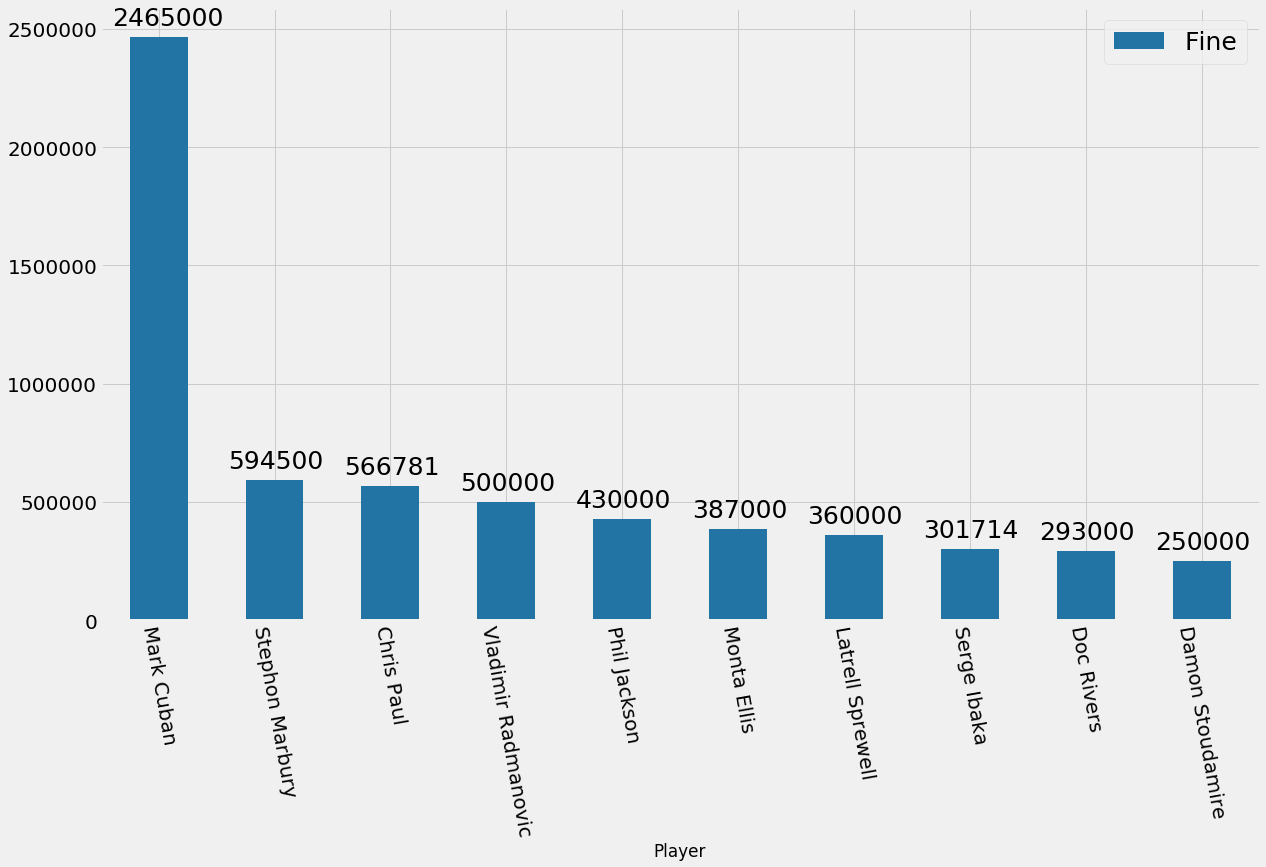

In [351]:
total_df.plot.bar(x='Player',y='Fine',color='#2274A5')
plt.xticks(rotation=280)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
a=-0.4
for c in total_df['Fine']:
    plt.text(a,c+50000,(str(c)),fontsize=25)
    a+=1
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(['Fine'],loc = 0, prop = {'size':25})


In [352]:
team_df.columns=['Team','Fine']

team_df = team_df.head(10)

In [353]:
team_df

,Team,Fine
21,Mavericks,3092265
3,Lakers,1967291
1,Knicks,1593134
9,Rockets,1353442
16,Pacers,1241011
20,Blazers,1154017
23,Warriors,948553
5,Celtics,817637
7,Bulls,806300
31,Wizards,799742


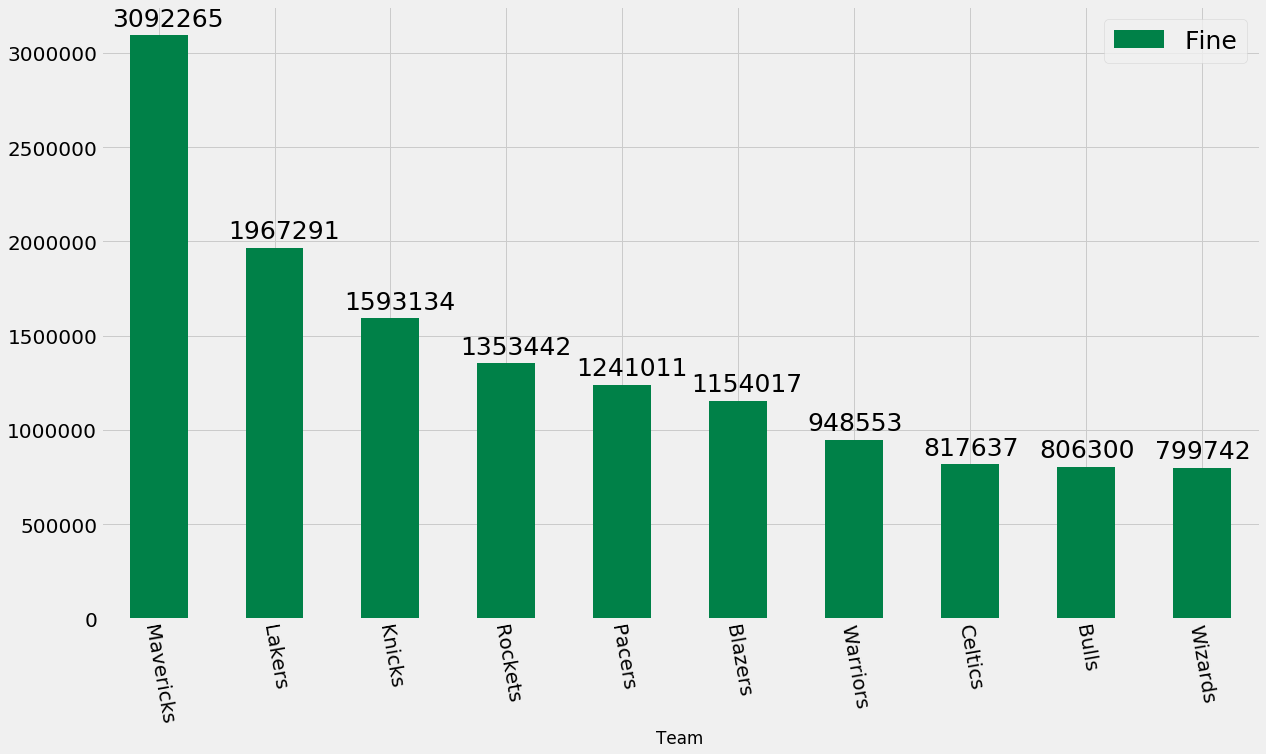

In [356]:
team_df.plot.bar(x='Team',y='Fine',color='#008148')
plt.xticks(rotation=280)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
a=-0.4
for c in team_df['Fine']:
    plt.text(a,c+50000,(str(c)),fontsize=25)
    a+=1
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(['Fine'],loc = 0, prop = {'size':25})


In [358]:
year_df.columns=['Years','Fine']

In [363]:
year_df['Years']=year_df['Years'].apply(lambda x: x+"0's")

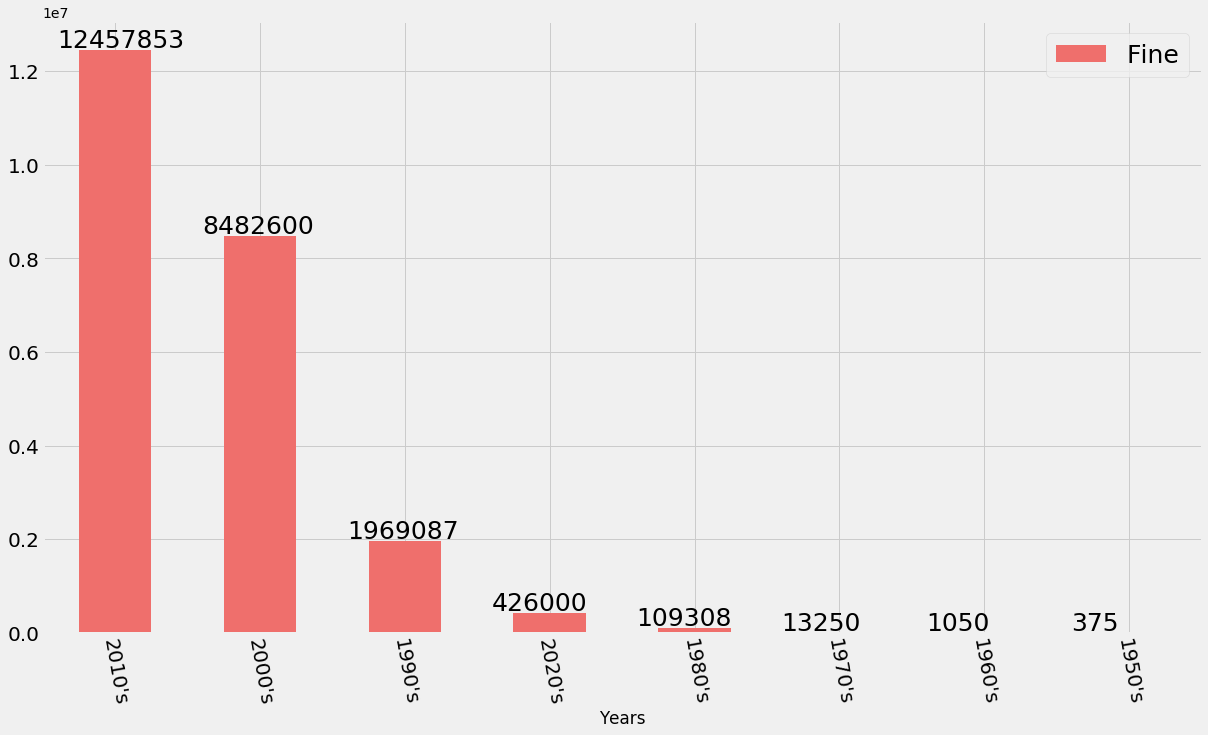

In [367]:
year_df.plot.bar(x='Years',y='Fine',color='#EF6F6C')
plt.xticks(rotation=280)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
a=-0.4
for c in year_df['Fine']:
    plt.text(a,c+50000,(str(c)),fontsize=25)
    a+=1
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(['Fine'],loc = 0, prop = {'size':25})
